In [99]:
import os
import sys
import time
import glob
import datetime 
import sqlite3
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [106]:
# dataframe with full song data in 10 randomly selected playlists
full_50_df = pd.read_csv('complete_playlists_50.csv')

col_of_interest = ["danceability","energy","mode","speechiness", "tempo", "instrumentalness", "loudness",
                   "acousticness", "key", "liveness", "valence", "duration_ms"]

In [107]:
# Standardize values so that we can see variance on the same scale later 
for i in col_of_interest:
    full_50_df[i] = MinMaxScaler().fit_transform(full_50_df[i].values.reshape(-1,1))

In [108]:
# Find variance of each feature in the 50 playlists
playlist_variance = full_50_df.groupby(["fid",'pid']).var()

In [109]:
playlist_variance.head()

,,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
fid,pid,,,,,,,,,,,,,,
16,705,368.500000,0.001583,0.009252,0.019309,0.104560,0.001888,0.248019,0.010111,0.012009,0.032633,0.020121,0.029451,0.012232,0.015152
29,736,3.500000,0.002229,0.024922,0.016280,0.142149,0.000886,0.166667,0.000677,0.016139,0.007790,0.001504,0.063813,0.014886,0.000000
52,746,101.175676,0.002431,0.019373,0.025859,0.140595,0.007580,0.247748,0.019274,0.027657,0.001101,0.026698,0.050108,0.019467,0.027027
112,480,3451.000000,0.000768,0.010404,0.018977,0.100911,0.003482,0.207189,0.003816,0.015333,0.003518,0.028689,0.046586,0.016486,0.009803
113,190,208.490196,0.001324,0.020430,0.040405,0.098130,0.005042,0.148235,0.001224,0.080724,0.012160,0.011439,0.060898,0.019944,0.139608


In [110]:
var_list = []

for x in range(len(col_of_interest)):
    var_list.append(playlist_variance[col_of_interest[x]])

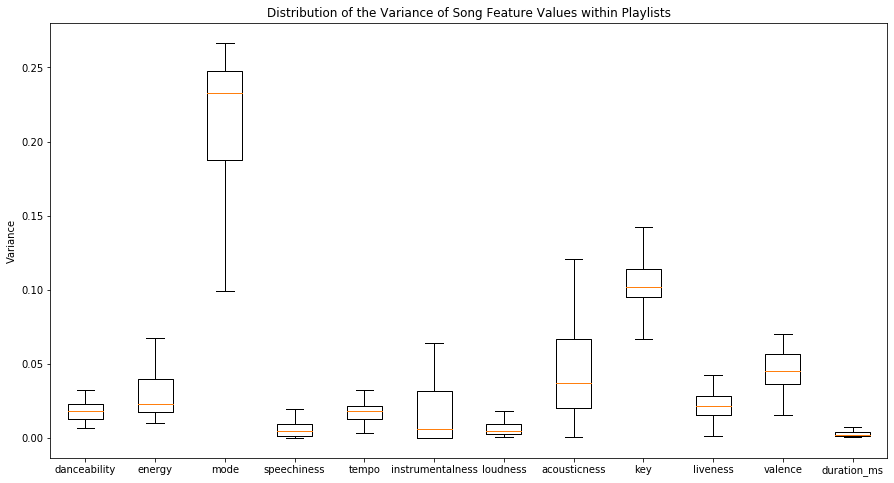

In [111]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
ax.boxplot(var_list, showfliers=False)
ax.set_title("Distribution of the Variance of Song Feature Values within Playlists")
ax.set_ylabel("Variance")
ax.set_xticklabels(col_of_interest)

plt.show()

We also took a look at the variance in features expressed in the songs chosen for inclusion within individual playlists.  We took a subset of 50 full playlists from the Spotify API, and from this dataset, found the audio features for each song in each playlist. We then standardized the values (by each feature) so that the variance can be seen at the same scale. We then made the above boxplot, showing the distribution of the variances of each feature across the 50 playlists. 

As we can see from the above boxplots, there clearly *are* some features that tend to cluster together within playlists; for instance, danceability has on average a relatively low variance across all songs in a playlist.  This means, simply, that most of the songs in any one playlist will tend to have the same values for danceability.  This seems intuitively to make sense: playlists are often made with or without dancing in mind, so a song that is less danceable would not fit into a playlist with songs that are very danceable.  In other words, playlists may tend to select for danceability.  On the other end, acousticness and mode had relatively higher variances, meaning that these features may not necessarily be selected for in particular when people create playlists.  These trends from our EDA will be important to consider when moving on with the project.